## 1.	Introduction	
A fast-food chain company is going to launch a new product in all its stores at different locations in different markets. In order to help the company marketing team choose the most effective promotion strategy from three potential marketing campaigns, the new product is introduced in randomly selected stores at different locations in different markets, using these three different promotion strategies. Weekly sales for each store are collected for the first four weeks. 
To facilitate the marketing team to make a decision on which promotion to use for maximizing the sales from the new product, I am focused on comparing the difference in weekly sales using every two promotions each time and find the most effective promotion strategy that brings the most weekly sales in the first 4 weeks.

## 2.	Hypothesis	
### Hypothesis 1: for comparing promotion 1 and promotion 2
Hypothesis 1:<br>
H0: There is no significant difference between the average sales using promotions 1 and 2<br>
H1: There is a significant difference between the average sales using promotions 1 and 2<br>
### Hypothesis 2: for comparing promotion 1 and promotion 3
Hypothesis 2:<br>
H0: There is no significant difference between the average sales using promotions 1 and 3<br>
H1: There is a significant difference between the average sales using promotions 1 and 3<br>
### Hypothesis 3: for comparing promotion 2 and promotion 3
Hypothesis 3:<br>
H0: There is no significant difference between the average sales using promotions 2 and 3<br>
H1: There is a significant difference between the average sales using promotions 2 and 3<br>

## 3.	Data
The data comes from [Kaggle](https://www.kaggle.com/code/chebotinaa/a-b-testing-of-fast-food-marketing-campaign/data?select=WA_Marketing-Campaign.csv) and contains 548 observations and 7 variables. There are no missing values.<br> 
Among them, 172 stores use promotion 1, 188 stores use promotion 2, and 188 stores use promotion 3. Variables include market information (MarketID, MarketSize), store information (LocationID, AgeOfStore), Promotion category, week number, and weekly sales. Among them, MarketID, LocationID, AgeOfStore, Promotion, and week is integer data, SalesInThousands is float data, and MarketSize is categorical data.

In [1]:
#set up environment

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [2]:
#read in data from local disk 
#Download "WA_Marketing-Campaign.csv" from https://www.kaggle.com/code/chebotinaa/a-b-testing-of-fast-food-marketing-campaign/data?select=WA_Marketing-Campaign.csv

df = pd.read_csv("WA_Marketing-Campaign.csv")

In [3]:
#check data types of all variables
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
#check number of unique values in each variable

df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [5]:
# check numbers of store adopting 3 different promotion strategies

df['Promotion'].value_counts()

3    188
2    188
1    172
Name: Promotion, dtype: int64

In [6]:
# check numbers of store in different size of market

df['MarketSize'].value_counts()

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64

## 4.	Methods
For this analysis, I will create three DataFrames containing the records for the stores adopting promotion 1, promotion 2, and promotion 3. I will compare the weekly sales (SalesInThousands) of the stores using every two promotions each time using A/B test. <br>
If the distributions of weekly sales appear to be closed to normal distribution based on histogram, skewness, and kurtosis, I will also do an independent t-test between the groups at the two-tail, 95% confidence interval.

In [7]:
#make a copy before wrangling data

df_copy=df.copy()

In [8]:
# create DataFrames df_1, df_2 and df_3 for the observations using promotion 1, 2, and 3 

df_1 = df_copy[df_copy['Promotion']==1]
df_2 = df_copy[df_copy['Promotion']==2]
df_3 = df_copy[df_copy['Promotion']==3]

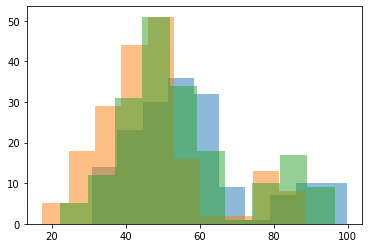

DescribeResult(nobs=172, minmax=(30.81, 99.65), mean=58.09901162790698, variance=274.0276884910921, skewness=0.8584598990251848, kurtosis=0.028427078029207298)
DescribeResult(nobs=188, minmax=(17.34, 88.64), mean=47.32941489361701, variance=228.28051462908184, skewness=0.9205468089457273, kurtosis=0.6614223889447377)
DescribeResult(nobs=188, minmax=(22.18, 96.48), mean=55.36446808510639, variance=281.10649436795995, skewness=0.7642424551272544, kurtosis=-0.17873345855514788)


In [9]:
plt.hist(df_1['SalesInThousands'],alpha=0.5)
plt.hist(df_2['SalesInThousands'],alpha=0.5)
plt.hist(df_3['SalesInThousands'],alpha=0.5)
plt.show()
print(stats.describe(df_1['SalesInThousands']))
print(stats.describe(df_2['SalesInThousands']))
print(stats.describe(df_3['SalesInThousands']))

#Sales are close to normally distributed according to the histgram, skewness, and kurtosis.

In [10]:
print("Promotion 1-2:",stats.ttest_ind(df_1['SalesInThousands'], df_2['SalesInThousands']))
print("Promotion 1-3:",stats.ttest_ind(df_1['SalesInThousands'], df_3['SalesInThousands']))
print("Promotion 2-3:",stats.ttest_ind(df_2['SalesInThousands'], df_3['SalesInThousands']))

Promotion1-2: Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)
Promotion1-3: Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313277)
Promotion2-3: Ttest_indResult(statistic=-4.88139271089348, pvalue=1.5628943036277377e-06)


In [12]:
# Confidence interval function

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_1_mean - sample_2_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print("For promotion 1 and 2:",get_95_ci(df_1['SalesInThousands'], df_2['SalesInThousands']))
print("For promotion 2 and 3:",get_95_ci(df_2['SalesInThousands'], df_3['SalesInThousands']))

# What is the average weekly sales on these three promotions?

print(df_1['SalesInThousands'].mean())
print(df_2['SalesInThousands'].mean())
print(df_3['SalesInThousands'].mean())

For promotion 1 and 2: The difference in means at the 95% confidence interval (two-tail) is between 7.48553365499947 and 14.053659813580454.
For promotion 2 and 3: The difference in means at the 95% confidence interval (two-tail) is between -11.261325935367037 and -4.808780447611529.
58.099011627907046
47.329414893617084
55.36446808510637


## 5.	Results
Based on p<<0.05 of t-test for promotion 1-2, I refject the null H0 for hypothesis 1.--there is significant difference in SalesInThousands between promotion 1 and 2.<br>
Based on p<<0.05 of t-test for promotion 2-3, I refject the null H0 for hypothesis 1 and 3.--there is significant difference in SalesInThousands between promotion 1 and 2, promotion 2 and 3.<br>
Based on p=0.12 of t-test for promotion 1-3, I fail to reject the null H0 of hypothesis 2 -- there is no significant difference in SalesInThousands between promotion 1 and 3.

## 6.	Discussion and recommendation
Weekly sales using promotion 1 are on average significantly higher than the one using promotion 2. Weekly sales using promotion 3 are on average significantly higher than the one using promotion 2. There is no significant difference in the weekly sales using promotion 1 and 3. 
Therefore, I will suggest the company market team choosing promotion 1 or promotion 3 for launching the new product in all stores.<br>
As a next step in the decision process, I will examine the effect of promotion strategies on the weekly sales for longer time not limited to 4 weeks. Moreover, I will also examine the effect of promotions on the sales of different stores in different locations or market sizes, and effect on new stores or old stores as well.Then the company marketing team can use different promotion strategies for different stores to get the most sales of the new product.